# Lab IT 104

### Data visualization Lab

Objectives:

* Learn the importance of visualization of data
* Develop critical thinking skill
* Run a small predictive machine learning model (you are not asked any questions on it)

## Submit your answers, screenshots on a word document and attach an HTML version of this file. [Total 2 files to be submitted]

Your should be able to answer the following question after this activity:

# Lab Activity: *** [Answer only in terms of the activity and not any other example]***

*** Objective: Critical thinking!***

1. Question 1: Briefly explain why data visualization is important. Support with an example from the activity?

2. Question 2: What do you conclude from the visualization of this data? Support it with atleast 3 findings relevant from given dataset. Also, include a screen shot of the chart that supports your answers.

3. Question 3: What does a dataset (df in our case) consists of? What would be the issue in the chart when you replace 'y' with 'x'?

4. Question 4: How many rows and columns the dataset has? What relationships can we deduce from this visual analysis?

5. Question 5: Why do you think we focused on 'y' variable instead of any other variable?

# Quiz Questions: *** [Answer only in terms of the activity and not any other example]***

*** Objective: Visualization Analysis from the dataset used in class! ***

1. Question 1: Explain in 300 words or more about the steps from the begining to the end of this project and explain your learning from it.

2. Question 2: Why do you think the result from 'df.describe().T' is important? What does .T do? Why would we use .T at all?

# Some basics to run this jupyter notebook:
1. Press ***"shift + enter"*** to run a code cell.
    * You can also use the play button on the menu to run a code cell.
2. Use ***"Control + Z"*** to undo

# Importing Dependencies

In [1]:
# data structure and mathematics library of Python
import pandas as pd
import numpy as np

# Plotting libraries of Python
#%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import pylab
import seaborn as sns
# controlling the width of the charts to 3 by 3
pylab.rcParams['figure.figsize'] = (3, 3)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
'''
Reading the dataset from the github repository in the pandas dataframe 
and, setting the view option of pandas to show up all columns in the dataset
'''

df = pd.read_csv("https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv")
ncol = df.shape[1]
pd.set_option('display.max_columns', ncol)

'''
Lets see how our data looks like by using df.head(5)
Change the number inside the brackets to view more rows
example:  df.head(10))
'''
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Importing data for lab activity and quiz

*** About dataset:*** The dataset comes from the UCI Machine Learning repository, and provides the bank customers information related to direct marketing campaigns (phone calls) of a Portuguese banking institution. 

***Goal:*** Use visualization to understand the data and predict whether the client will subscribe (1/0) to a term deposit (variable y, 1: Subscribe and 0: Not Subscribe).

***About Columns (this thing is also called data dictionary): ***

* age (numeric)
* job: type of job (categorical: admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
* marital: marital status (categorical: divorced, married, single, unknown)
* education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
* default: has credit in default? (categorical: no, yes, unknown)
* housing: has housing loan? (categorical: no, yes, unknown)
* loan: has personal loan? (categorical: no, yes, unknown)
* contact: contact communication type (categorical: cellular, telephone)
* month: last contact month of year (categorical: jan, feb, mar, Â¦, nov,dec)
* day_of_week: last contact day of the week (categorical: mon, tue, wed, thu, fri)
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=no). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means clients were not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
* emp.var.rate: employment variation rate (numeric)
* cons.price.idx: consumer price index (numeric)
* cons.conf.idx: consumer confidence index (numeric)
* euribor3m: Euribor 3-month rate (numeric)
* nr.employed: number of employees (numeric)

Predict variable (desired target):
* y has the client subscribed a term deposit? (binary: 1, means Yes , 0 means  No )


In [3]:
# Dimensions of the dataset
df.shape

(41188, 21)

In [4]:
# lets get the summary of the dataset to give us some understanding about the dataset
df.describe().T  #.T here is used to transpose the result of df.describe() 

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# Lets get some details about column 'y'

In [5]:
# if you feel like try using .T here like:  df.groupby('y').mean().T
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [6]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [7]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [8]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## The summary of data above gives a lot of information but is it easy to remember?

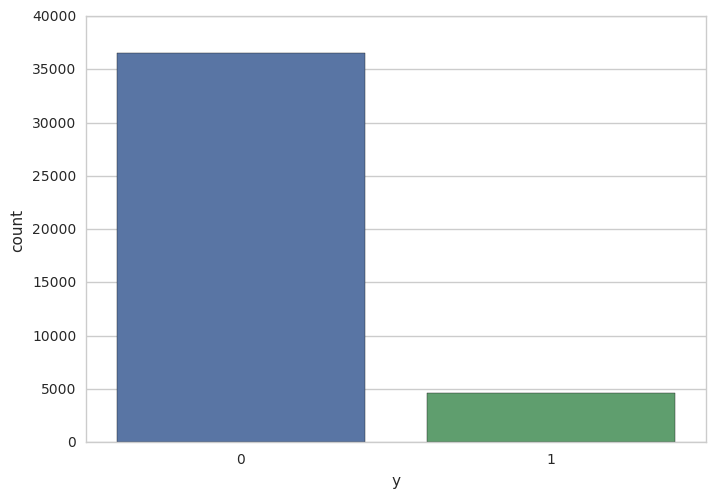

In [9]:
# Count of people that have subscribed in the given dataset
sns.countplot(x = 'y', data = df)
plt.show()

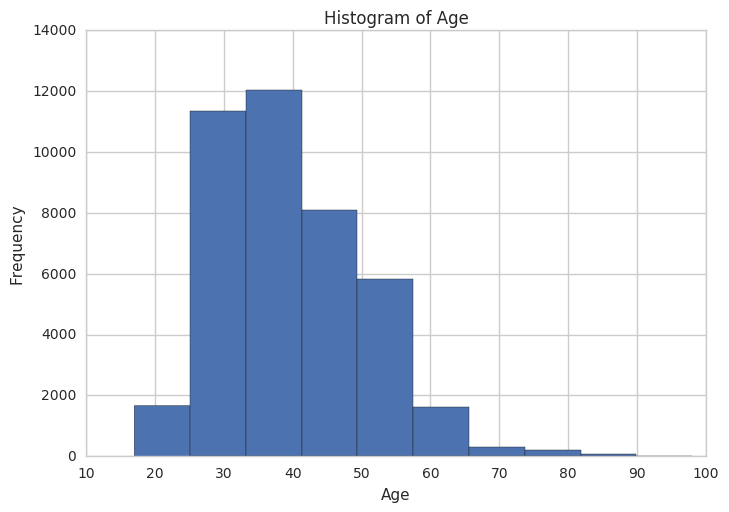

In [10]:
# What is the age of targeted audience?
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Do we have any problem in our dataset, like if we have missing records?
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

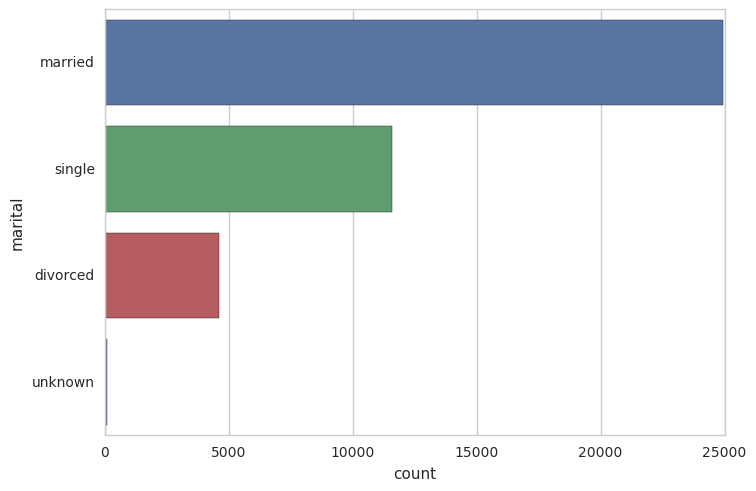

In [12]:
sns.countplot(y = df.marital, data = df)
plt.show()

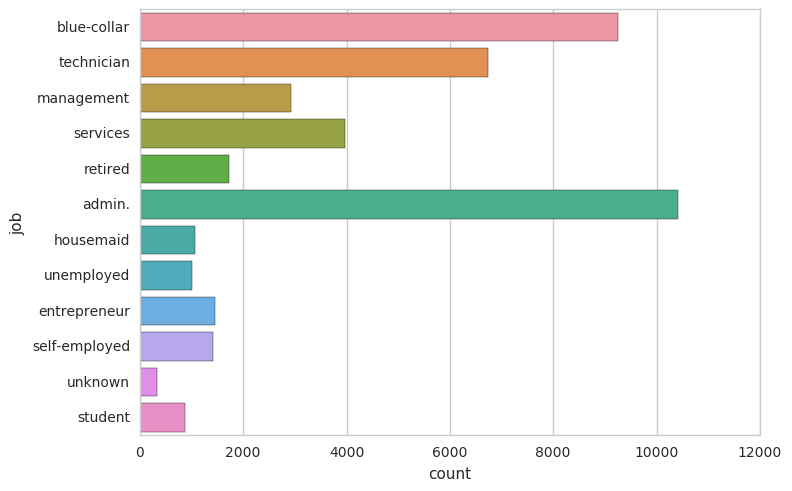

In [13]:
#####################################################
# try replacing y with x here, and report the problem
#####################################################

sns.countplot(y = df.job, data = df)
plt.show()

In [14]:
# A list of all the column names in our data.
print(df.columns)

# get first 5 rows of our data
df.head(5)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [15]:
# lets get some more understanding of data and relationships
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan     y
no       0    30100
         1     3850
unknown  0      883
         1      107
yes      0     5565
         1      683
dtype: int64


check 2:  job            y
admin.         0    9070
               1    1352
blue-collar    0    8616
               1     638
entrepreneur   0    1332
               1     124
housemaid      0     954
               1     106
management     0    2596
               1     328
retired        0    1286
               1     434
self-employed  0    1272
               1     149
services       0    3646
               1     323
student        0     600
               1     275
technician     0    6013
               1     730
unemployed     0     870
               1     144
unknown        0     293
               1      37
dtype: int64


check 3:  marital   y
divorced  0     4136
          1      476
married   0    22396
          1     2532
single    0     9948
          1     1620
unknown   0       68
          1       12
dtype: int64

### Now, that we have some quanttitative results we can try to visualize these relationships

A quick note on what have we learned so far:

* df.groupby(['loan','y']):   how does previous loan affect sale?
* df.groupby(['job','y']):  If job title significant for any sale?
* df.groupby(['marital','y']):  if you are unmarried then will be be willing to take loan? 
* df.groupby(['education','y']):  Does the education level boosts the chances of a sale?
* df.groupby(['poutcome','y']):  Are you willing to take a loan again if you got it previously?
* df.groupby(['month','y']):  Is there any seasonality?
* df.groupby(['y', 'default']).size():  How likely do people who defaulted takes loan?

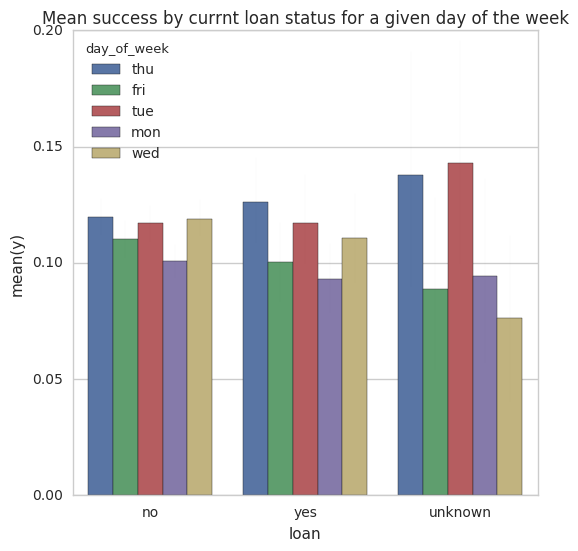

In [16]:
pylab.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x = 'loan', y = 'y', hue = 'day_of_week', data = df,
           ci=95, errwidth = 0.01)
plt.title('Mean success by currnt loan status for a given day of the week')
plt.show()

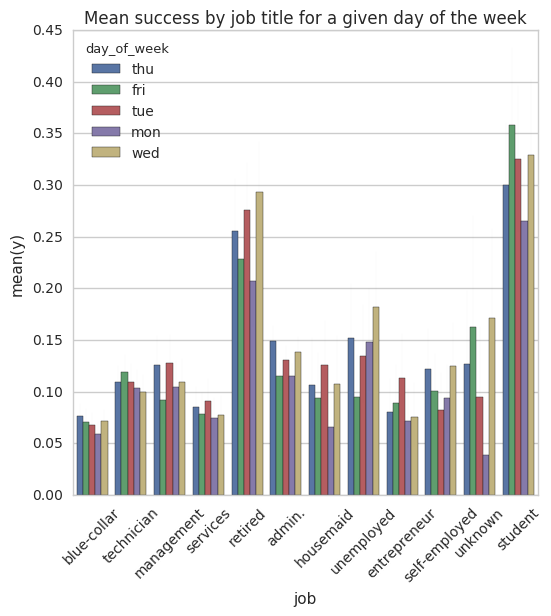

In [17]:
pylab.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x = 'job', y = 'y', hue = 'day_of_week', data = df,
           ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by job title for a given day of the week')
plt.show()

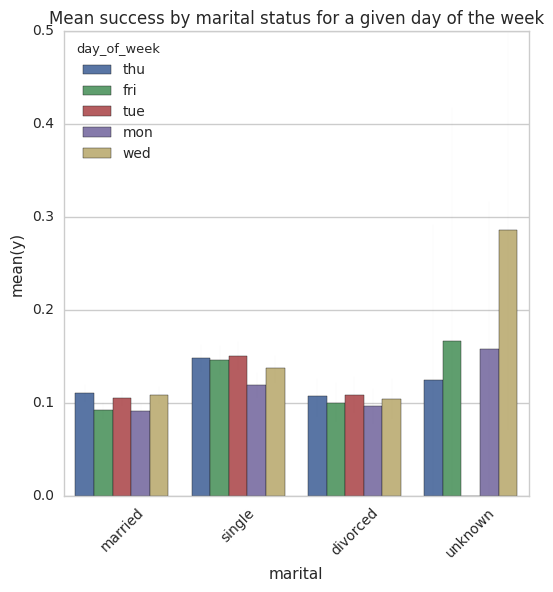

In [18]:
pylab.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x = 'marital', y = 'y', hue = 'day_of_week', data = df,
           ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by marital status for a given day of the week')
plt.show()

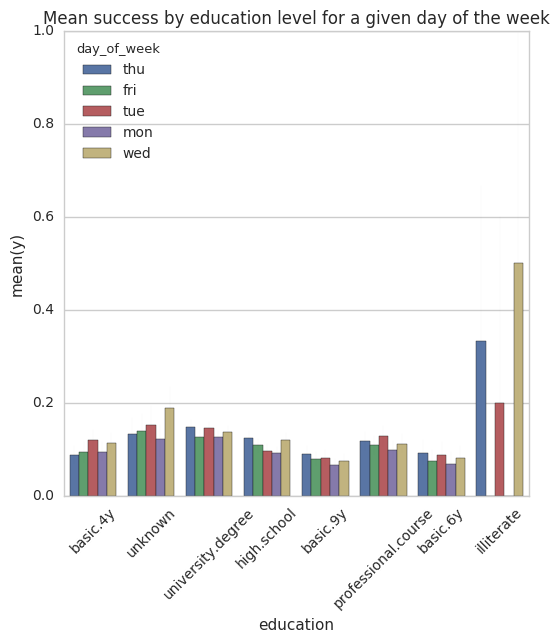

In [19]:
pylab.rcParams['figure.figsize'] = (6, 6)
sns.barplot(x = 'education', y = 'y', hue = 'day_of_week', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by education level for a given day of the week')
plt.show()

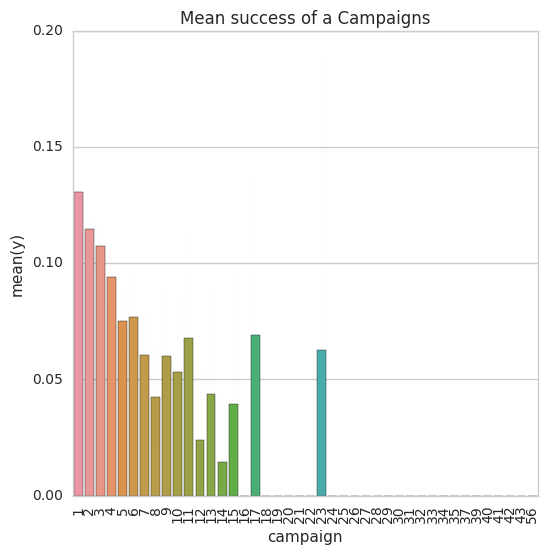

In [20]:
# Performance of Campaigns
sns.barplot(x="campaign", y="y", data=df, ci=95, errwidth = 0.01)
plt.xticks(rotation=90)
plt.title('Mean success of a Campaigns')
plt.show()

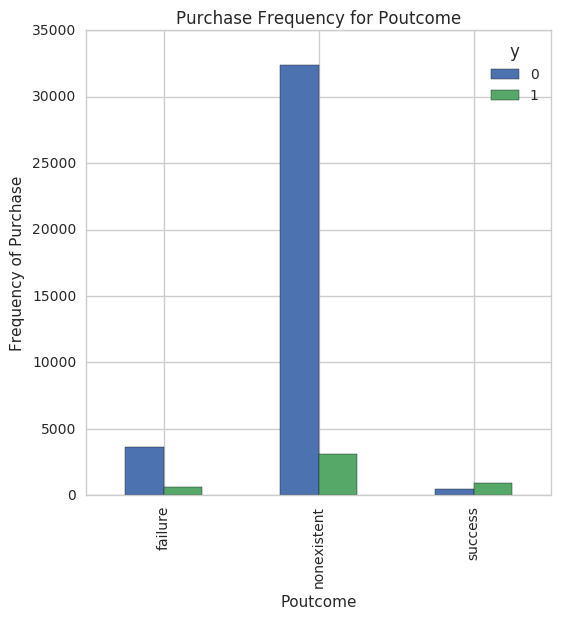

In [21]:
pd.crosstab(df.poutcome, df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

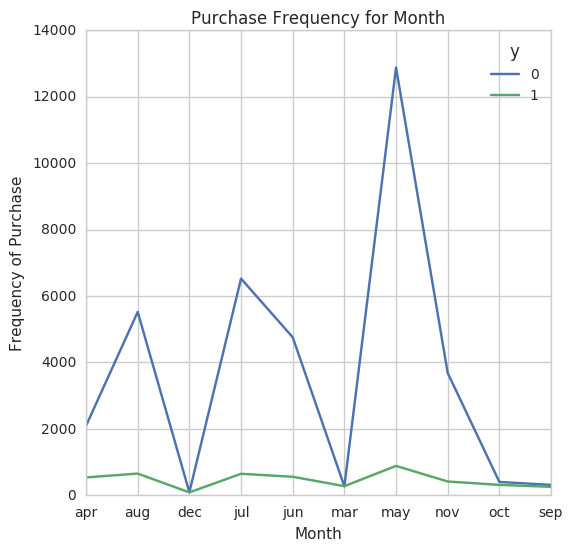

In [22]:
pd.crosstab(df.month, df.y).plot(kind='line')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

# END of notebook